### Global Data on Sustainable Energy EDA
In this notebook, I performed EDA on Ansh Tanwar's dataset "Global Data on Sustainable Energy (2000-2020)." While there was no specific project goal at the outset, I conducted this exploration with ML model constraints in mind.


### Importing required libraries

In [644]:
import pandas as pd

import numpy as np
import math

import seaborn as sns
from matplotlib import pyplot as plt
import geopandas as gpd

### Loading the dataset
Global Data on Sustainable Energy (2000-2020) is a dataset available publicly on [kaggle](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy), created by Ansh Tanwar, with an [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/legalcode) license.

This allows for sharing and adapting the dataset provided that appropriate credit is given, and any changes made are indicated. 

This notebook modifies that dataset while leaving the original "global-data-on-sustainable-energy.csv" file unchanged. 

In [645]:
df = pd.read_csv("global-data-on-sustainable-energy.csv")

## Getting general info about the dataset
Useful information about the dataset, such as column names, data types and distribution of values should be examined first.

In [646]:
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,"6,52,230",33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,"6,52,230",33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,"6,52,230",33.93911,67.709953


In [647]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [648]:
df.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,64.963051,178.065032


In [649]:
num_countries = df["Entity"].unique().size
print(str(num_countries) + " total countries")

176 total countries


In [650]:
num_years_per_country = df.groupby(by="Entity")["Year"].count().reset_index()
num_years_per_country[num_years_per_country["Year"] != 21]

,Entity,Year
58,French Guiana,1
105,Montenegro,14
140,Serbia,14
149,South Sudan,8


All 176 countries in the dataset have 21 years recorded except French Guiana, Montenegro, Serbia, and South Sudan, which have 1, 14, 14, and 8 years (rows) respectively. 

In [651]:
mask = (df["Entity"] == "French Guiana") | (df["Entity"] == "Montenegro") | (df["Entity"] == "Serbia") | (df["Entity"] == "South Sudan")
df[mask]

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
1218,French Guiana,2000,NaN,NaN,702.29,NaN,23.84,0.43,0.0,0.00,...,13692.39400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2185,Montenegro,2007,100.000000,64.80,NaN,NaN,42.27,0.86,0.0,1.28,...,21851.39300,4.710000,2099.999905,NaN,6.810150,5976.394145,47,"13,812",42.708678,19.374390
2186,Montenegro,2008,100.000000,64.20,NaN,NaN,38.76,1.29,0.0,1.54,...,24712.11500,4.730000,2690.000057,NaN,7.222753,7367.751909,47,"13,812",42.708678,19.374390
2187,Montenegro,2009,100.000000,63.30,NaN,NaN,49.16,0.69,0.0,2.07,...,21325.20500,3.980000,1750.000000,NaN,-5.795097,6727.107767,47,"13,812",42.708678,19.374390
2188,Montenegro,2010,100.000000,63.00,NaN,NaN,49.09,1.27,0.0,2.75,...,26631.98800,4.550000,2579.999924,NaN,2.734331,6688.482400,47,"13,812",42.708678,19.374390
2189,Montenegro,2011,99.000000,62.60,NaN,NaN,42.77,1.45,0.0,1.20,...,21941.47900,4.390000,2539.999962,NaN,3.228451,7328.932252,47,"13,812",42.708678,19.374390
2190,Montenegro,2012,100.000000,61.90,NaN,NaN,45.86,1.37,0.0,1.48,...,21276.30500,4.250000,2329.999924,NaN,-2.723791,6586.721279,47,"13,812",42.708678,19.374390
2191,Montenegro,2013,99.700000,61.70,NaN,NaN,49.34,1.44,0.0,2.50,...,22880.11100,3.800000,2269.999981,NaN,3.548980,7186.429787,47,"13,812",42.708678,19.374390
2192,Montenegro,2014,97.700000,61.45,NaN,NaN,45.95,1.42,0.0,1.75,...,20434.42000,3.640000,2220.000029,NaN,1.783699,7378.345289,47,"13,812",42.708678,19.374390
2193,Montenegro,2015,100.000000,61.40,NaN,NaN,42.96,1.51,0.0,1.49,...,21034.89500,3.680000,2359.999895,NaN,3.390381,6514.272695,47,"13,812",42.708678,19.374390


## Fixing data types
There are 3 "object" data types, in this case strings. "Entity" (country) should be a string, but Land Area(Km2) and Density\n(P/Km2) should be numeric. This can be fixed by removing the comma's and casting them to a float.


In [652]:
df["Density\\n(P/Km2)"] = df["Density\\n(P/Km2)"].str.replace(",","").astype(float)
df["Land Area(Km2)"] = df["Land Area(Km2)"].str.replace(",","").astype(float)


In [653]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

## Renaming Columns
Different columns have different naming formats (lowercase with dashes, lowercase with hyphens, Capitalized with spaces, etc). They can be made to all fallow the same format.


In [654]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [655]:
new_column_names = [
    "Country",
    "Year",
    "Electricity_Access",
    "Clean_Cooking_Fuels",
    "Renewables_Capacity_Per_Capita",
    "Financial_Flows_To_Developing_Countries",
    "Renewables_Share_Of_Consumption",
    "Electricity_From_Fossil_Fuels",
    "Electricity_From_Nuclear",
    "Electricity_From_Renewables",
    "Low-Carbon_Electricity",
    "Energy_Consumption_Per_Capita",
    "Energy_Intensity",
    "CO2_Emissions",
    "Renewables_Share_Of_Primary_Energy",
    "GDP_Growth",
    "GDP_per_Capita",
    "Density",
    "Land_Area",
    "Latitude",
    "Longitude"
]

df.columns = new_column_names

In [656]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  3649 non-null   object 
 1   Year                                     3649 non-null   int64  
 2   Electricity_Access                       3639 non-null   float64
 3   Clean_Cooking_Fuels                      3480 non-null   float64
 4   Renewables_Capacity_Per_Capita           2718 non-null   float64
 5   Financial_Flows_To_Developing_Countries  1560 non-null   float64
 6   Renewables_Share_Of_Consumption          3455 non-null   float64
 7   Electricity_From_Fossil_Fuels            3628 non-null   float64
 8   Electricity_From_Nuclear                 3523 non-null   float64
 9   Electricity_From_Renewables              3628 non-null   float64
 10  Low-Carbon_Electricity                   3607 no

## Examining missing values
This dataset has a large number of NaN/Null values. It will be necessary to understand how they are distributed, and what they represent (unrecorded, "0", not applicable, etc).


In [657]:
num_null = df.isna().sum()
num_null

Country                                       0
Year                                          0
Electricity_Access                           10
Clean_Cooking_Fuels                         169
Renewables_Capacity_Per_Capita              931
Financial_Flows_To_Developing_Countries    2089
Renewables_Share_Of_Consumption             194
Electricity_From_Fossil_Fuels                21
Electricity_From_Nuclear                    126
Electricity_From_Renewables                  21
Low-Carbon_Electricity                       42
Energy_Consumption_Per_Capita                 0
Energy_Intensity                            207
CO2_Emissions                               428
Renewables_Share_Of_Primary_Energy         2137
GDP_Growth                                  317
GDP_per_Capita                              282
Density                                       1
Land_Area                                     1
Latitude                                      1
Longitude                               

In [658]:
countries_null = df[df.isna().any(axis=1)]["Country"].unique().size
print(str(countries_null) + " countries have columns with null values")

176 countries have columns with null values


In [659]:
percent_nan = (df.isna().sum()/df.shape[0]*100).reset_index()
percent_nan

,index,0
0,Country,0.000000
1,Year,0.000000
2,Electricity_Access,0.274048
3,Clean_Cooking_Fuels,4.631406
4,Renewables_Capacity_Per_Capita,25.513839
5,Financial_Flows_To_Developing_Countries,57.248561
6,Renewables_Share_Of_Consumption,5.316525
7,Electricity_From_Fossil_Fuels,0.575500
8,Electricity_From_Nuclear,3.453001
9,Electricity_From_Renewables,0.575500


There are numerous NaN values in multiple rows, however the single NaN value in each of Density, Land Area, Latitude and Longitude are the most interesting. They are all from the same row belonging to French Guiana. This is also the ONLY row for French Guiana, as it only has data for the year 2000.

In [660]:
n1 = df[(df["Density"].isna()) | (df["Land_Area"].isna()) | (df["Latitude"].isna()) | (df["Longitude"].isna())]
n1

,Country,Year,Electricity_Access,Clean_Cooking_Fuels,Renewables_Capacity_Per_Capita,Financial_Flows_To_Developing_Countries,Renewables_Share_Of_Consumption,Electricity_From_Fossil_Fuels,Electricity_From_Nuclear,Electricity_From_Renewables,...,Energy_Consumption_Per_Capita,Energy_Intensity,CO2_Emissions,Renewables_Share_Of_Primary_Energy,GDP_Growth,GDP_per_Capita,Density,Land_Area,Latitude,Longitude
1218,French Guiana,2000,NaN,NaN,702.29,NaN,23.84,0.43,0.0,0.0,...,13692.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [661]:
df[df["Country"] == "French Guiana"]

,Country,Year,Electricity_Access,Clean_Cooking_Fuels,Renewables_Capacity_Per_Capita,Financial_Flows_To_Developing_Countries,Renewables_Share_Of_Consumption,Electricity_From_Fossil_Fuels,Electricity_From_Nuclear,Electricity_From_Renewables,...,Energy_Consumption_Per_Capita,Energy_Intensity,CO2_Emissions,Renewables_Share_Of_Primary_Energy,GDP_Growth,GDP_per_Capita,Density,Land_Area,Latitude,Longitude
1218,French Guiana,2000,NaN,NaN,702.29,NaN,23.84,0.43,0.0,0.0,...,13692.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Removing NaN Values
How NaN values are handled can have a significant impact on any model built using the dataset.
The general solutions are: removing rows, removing columns, or replacing NaN values (with 0, the mean, or some other value for example)

In [662]:
# What if we removed all rows that contain a NaN value?
df_dropped_nan = df.dropna(axis=0)

num_left = df_dropped_nan.shape[0]
num_total = df.shape[0]
percent_left = (num_left / num_total) * 100
print("Remaining Rows: " + str(num_left) + " of " + str(num_total) + ", {percent:.2f}%".format(percent=percent_left))

Remaining Rows: 343 of 3649, 9.40%


With less than 10% of the rows remaining, it may make more sense to limit the number of columns first before removing NaN values.
DataFrame.dropna() includes a "thresh" parameter that only drops rows/columns if they have more NaN values than the specified threshold.

In [663]:
# Determining how many rows remain after dropping columns with the most NaN values
# The results have no NaN values, like above, but have less columns than the original dataset
def generate_nan_table(df):
    df_dropped_nan_info = pd.DataFrame(columns=["Threshold", "Threshold_%", "Remaining_Columns", "Remaining_Rows", "Remaining_Columns_%", "Remaining_Rows_%"])
    
    thresholds = df.shape[0] - df.isna().sum().drop_duplicates(keep="first").sort_values(ascending=False)
    for thresh in thresholds:
        
        df_dropped_columns = df.dropna(axis=1, thresh=thresh)
        
        df_dropped_nan = df_dropped_columns.dropna(axis=0)
        
        remaining_columns = df_dropped_columns.shape[1]
        remaining_rows = df_dropped_nan.shape[0]
        remaining_columns_percent = (remaining_columns / df.shape[1]) * 100
        remaining_rows_percent = (remaining_rows / df.shape[0]) * 100
        new_row = {"Threshold": thresh, 
                                    "Threshold_%": "{x:.2f}".format(x=100*(thresh)/df.shape[0]), 
                                    "Remaining_Columns": remaining_columns,
                                    "Remaining_Rows": remaining_rows, 
                                    "Remaining_Columns_%": "{x:.2f}".format(x=remaining_columns_percent), 
                                    "Remaining_Rows_%": "{x:.2f}".format(x=remaining_rows_percent)}
        
        df_dropped_nan_info = pd.concat([df_dropped_nan_info, pd.DataFrame(new_row, index=[0])], ignore_index=True)
    return df_dropped_nan_info
    
generate_nan_table(df)
    

,Threshold,Threshold_%,Remaining_Columns,Remaining_Rows,Remaining_Columns_%,Remaining_Rows_%
0,1512,41.44,21,343,100.00,9.40
1,1560,42.75,20,1356,95.24,37.16
2,2718,74.49,19,2082,90.48,57.06
3,3221,88.27,18,2868,85.71,78.60
4,3332,91.31,17,2889,80.95,79.17
5,3367,92.27,16,2907,76.19,79.67
6,3442,94.33,15,3153,71.43,86.41
7,3455,94.68,14,3165,66.67,86.74
8,3480,95.37,13,3345,61.90,91.67
9,3523,96.55,12,3492,57.14,95.70


By dropping 8 Columns, we can keep over 90% of the rows without having any NaN values.
This may not be ideal however, if any of the 8 columns are needed for analysis.

In [664]:
# What columns were dropped in order to keep over 90% of the rows?
df_dropped_columns = df.dropna(axis=1, thresh=3480)
np.setdiff1d(df.columns, df_dropped_columns.columns)

array(['CO2_Emissions', 'Energy_Intensity',
       'Financial_Flows_To_Developing_Countries', 'GDP_Growth',
       'GDP_per_Capita', 'Renewables_Capacity_Per_Capita',
       'Renewables_Share_Of_Consumption',
       'Renewables_Share_Of_Primary_Energy'], dtype=object)

Alternatively, we can replace NaN values with other values.
Keeping all columns, but injecting inaccurate data.
This could be used to improve model performance, although it could also introduce bias.

In [665]:
# The same summary statistic does not need to be used for each column,
# It may be better to use different summary statistics or even introduce jitter depending on the project
df_NaN_to_mean = df.fillna(df.mean(numeric_only=True))
df_NaN_to_median = df.fillna(df.median(numeric_only=True))
print("Number of NaN in mean-replaced dataframe: " + str(df_NaN_to_mean.isna().sum().sum()))
print("Number of NaN in median-replaced dataframe: " + str(df_NaN_to_median.isna().sum().sum()))


Number of NaN in mean-replaced dataframe: 0
Number of NaN in median-replaced dataframe: 0


## Handling Duplicates
This dataset does not contain any duplicate rows, or duplicate combinations of Countries and Years (No country has multiple rows for the same year)

In [666]:
duplicates = df[df.duplicated(keep="first")]
print(str(duplicates.shape[0]) + " duplicate rows")

0 duplicate rows


In [667]:
country_years = df[["Country","Year"]]
duplicate_country_years = country_years[country_years.duplicated(keep="first")]
print(str(duplicate_country_years.shape[0]) + " duplicate country-year combos")

0 duplicate country-year combos


## Handling Outliers


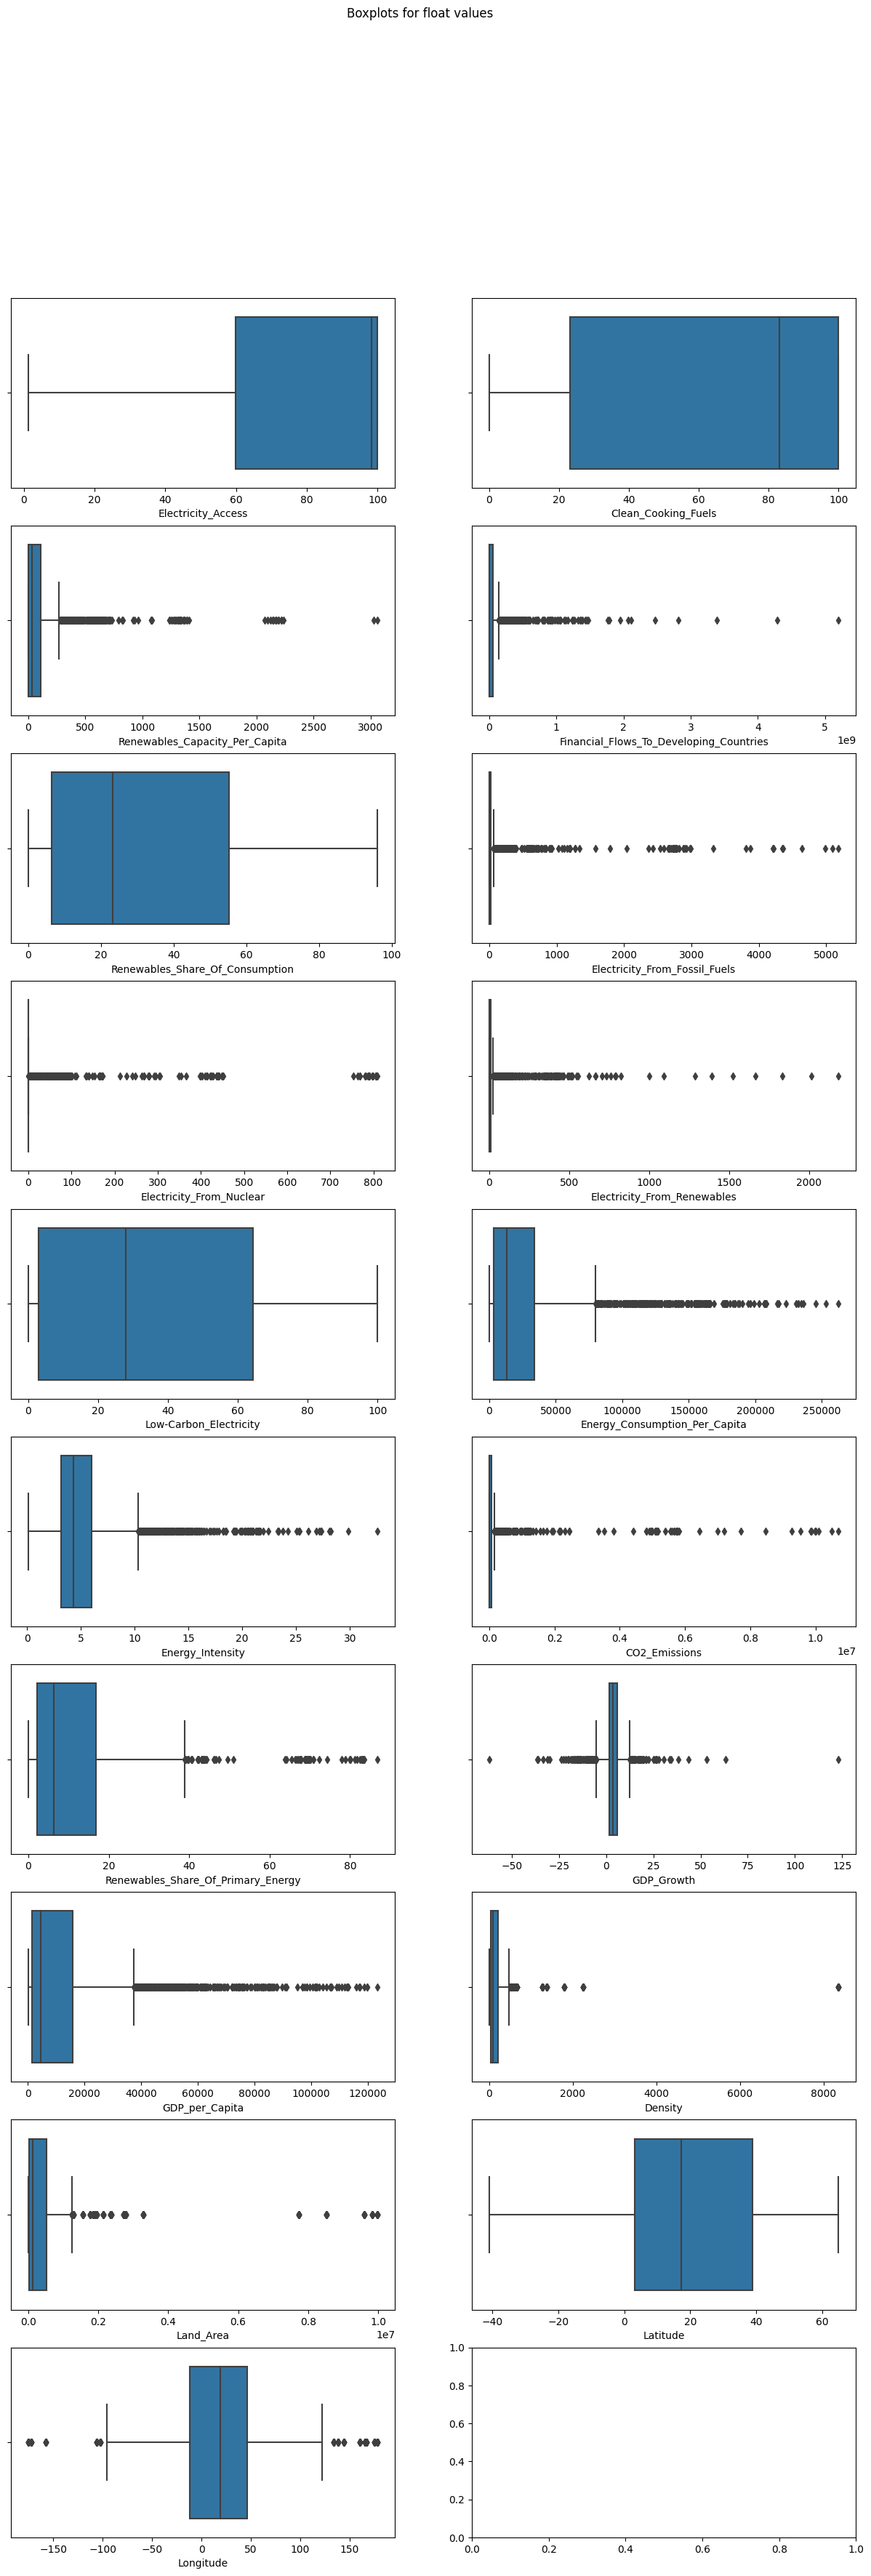

In [668]:
# Visualizing Outliers using Boxplots
i = 2
num_columns = df.shape[1]
fig, axes = plt.subplots(math.ceil((num_columns-2)/2),2, figsize=(15,40))
fig.suptitle("Boxplots for float values")

while i < num_columns:
    sns.boxplot(ax=axes[(i - 2) // 2, (i - 2) % 2], x=df[list(df.columns)[i]])
    i = i + 1
    
plt.show()


In [669]:
# Determine if a value is an outlier using the Inter-Quartile Range.
def make_outlier_masks(df, columns):
    outliers_above = df[columns].copy()
    outliers_below = df[columns].copy()

    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        upper_thresh = q3 + 1.5*iqr
        lower_thresh = q1 - 1.5*iqr
        outliers_above[column] = (df[column] > upper_thresh)
        outliers_below[column] = (df[column] < lower_thresh)
    return outliers_below, outliers_above

In [670]:
# generate a dataframe describing how the outliers are distributed based on the column
def generate_outlier_dataframe(df, columns):
    outliers_below, outliers_above = make_outlier_masks(df, columns)
    df_outliers = pd.DataFrame()
    df_outliers["Column"] = columns
    df_outliers["Mean"] = df[columns].mean().reset_index()[0]
    df_outliers["Number of Outliers below mean"] = outliers_below.sum().reset_index()[0]
    df_outliers["Number of Outliers above mean"] = outliers_above.sum().reset_index()[0]
    df_outliers["Total Number of Outliers"] = (outliers_below | outliers_above).sum().reset_index()[0]
    df_outliers["Percent Outliers"] = ((outliers_below | outliers_above).sum() / df[columns].count()).reset_index()[0] * 100
    return df_outliers

In [671]:
outliers_df = generate_outlier_dataframe(df, df.columns[2:])
outliers_df

,Column,Mean,Number of Outliers below mean,Number of Outliers above mean,Total Number of Outliers,Percent Outliers
0,Electricity_Access,7.893370e+01,0,0,0,0.000000
1,Clean_Cooking_Fuels,6.325529e+01,0,0,0,0.000000
2,Renewables_Capacity_Per_Capita,1.131375e+02,0,301,301,11.074319
3,Financial_Flows_To_Developing_Countries,9.422400e+07,0,245,245,15.705128
4,Renewables_Share_Of_Consumption,3.263816e+01,0,0,0,0.000000
5,Electricity_From_Fossil_Fuels,7.036500e+01,0,518,518,14.277839
6,Electricity_From_Nuclear,1.345019e+01,0,578,578,16.406472
7,Electricity_From_Renewables,2.396801e+01,0,533,533,14.691290
8,Low-Carbon_Electricity,3.680118e+01,0,0,0,0.000000
9,Energy_Consumption_Per_Capita,2.574398e+04,0,237,237,6.494930


In [672]:
df_countries_merged = df.groupby(by=["Country"]).mean().reset_index()

# "Year" is not necessary for this dataframe, 
# however it helps keep visualizations more uniform with each other
# df_countries_merged = df_countries_merged.drop(labels="Year", axis=1)

generate_outlier_dataframe(df_countries_merged, df_countries_merged.columns[1:])

,Column,Mean,Number of Outliers below mean,Number of Outliers above mean,Total Number of Outliers,Percent Outliers
0,Year,2.010020e+03,1,3,4,2.272727
1,Electricity_Access,7.859097e+01,0,0,0,0.000000
2,Clean_Cooking_Fuels,6.303563e+01,0,0,0,0.000000
3,Renewables_Capacity_Per_Capita,1.168862e+02,0,15,15,11.450382
4,Financial_Flows_To_Developing_Countries,7.260255e+07,0,13,13,11.016949
5,Renewables_Share_Of_Consumption,3.255772e+01,0,0,0,0.000000
6,Electricity_From_Fossil_Fuels,6.952288e+01,0,25,25,14.285714
7,Electricity_From_Nuclear,1.327311e+01,0,30,30,17.647059
8,Electricity_From_Renewables,2.368429e+01,0,25,25,14.285714
9,Low-Carbon_Electricity,3.649175e+01,0,0,0,0.000000


In [673]:
# What about the DataFrames with NaN replaced with summary statistics?
generate_outlier_dataframe(df_NaN_to_mean, df_NaN_to_mean.columns[1:])

,Column,Mean,Number of Outliers below mean,Number of Outliers above mean,Total Number of Outliers,Percent Outliers
0,Year,2.010038e+03,0,0,0,0.000000
1,Electricity_Access,7.893370e+01,0,0,0,0.000000
2,Clean_Cooking_Fuels,6.325529e+01,0,0,0,0.000000
3,Renewables_Capacity_Per_Capita,1.131375e+02,0,301,301,8.248835
4,Financial_Flows_To_Developing_Countries,9.422400e+07,0,180,180,4.932858
5,Renewables_Share_Of_Consumption,3.263816e+01,0,0,0,0.000000
6,Electricity_From_Fossil_Fuels,7.036500e+01,0,531,531,14.551932
7,Electricity_From_Nuclear,1.345019e+01,0,704,704,19.292957
8,Electricity_From_Renewables,2.396801e+01,0,516,516,14.140861
9,Low-Carbon_Electricity,3.680118e+01,0,0,0,0.000000


In [674]:
generate_outlier_dataframe(df_NaN_to_median, df_NaN_to_median.columns[1:])

,Column,Mean,Number of Outliers below mean,Number of Outliers above mean,Total Number of Outliers,Percent Outliers
0,Year,2.010038e+03,0,0,0,0.000000
1,Electricity_Access,7.898694e+01,0,0,0,0.000000
2,Clean_Cooking_Fuels,6.417669e+01,0,0,0,0.000000
3,Renewables_Capacity_Per_Capita,9.266838e+01,0,469,469,12.852836
4,Financial_Flows_To_Developing_Countries,4.352525e+07,780,780,1560,42.751439
5,Renewables_Share_Of_Consumption,3.214170e+01,0,0,0,0.000000
6,Electricity_From_Fossil_Fuels,6.997714e+01,0,519,519,14.223075
7,Electricity_From_Nuclear,1.298576e+01,0,578,578,15.839956
8,Electricity_From_Renewables,2.383853e+01,0,533,533,14.606742
9,Low-Carbon_Electricity,3.669833e+01,0,0,0,0.000000


Replacing NaN values with summary statistics can have a significant impact on outliers.

## Data Engineering
Even though the dataset has many useful columns, some additional data can be gathered by performing operations on the existing data.
The dataset has the column "GDP_Growth" but does not have "growth" variables for other variables such as CO2_Emissions or Renewables_Share_Of_Consumption.
It has columns for Density and Land_Area but not population.
These can be easily engineered from the existing data.

In [675]:
df = df.sort_values(by=["Country","Year"])

df["CO2_Emissions_Growth"] = df.groupby("Country")["CO2_Emissions"].pct_change() * 100
df["Renewables_SOC_Growth"] = df.groupby("Country")["Renewables_Share_Of_Consumption"].pct_change() * 100
df["Nuclear_Growth"] = df.groupby("Country")["Electricity_From_Nuclear"].pct_change() * 100
df["Fossil_Fuels_Growth"] = df.groupby("Country")["Electricity_From_Fossil_Fuels"].pct_change() * 100
df["Renewables_Growth"] = df.groupby("Country")["Electricity_From_Renewables"].pct_change() * 100

df["Population"] = df["Density"] * df["Land_Area"]

df.head(40)


,Country,Year,Electricity_Access,Clean_Cooking_Fuels,Renewables_Capacity_Per_Capita,Financial_Flows_To_Developing_Countries,Renewables_Share_Of_Consumption,Electricity_From_Fossil_Fuels,Electricity_From_Nuclear,Electricity_From_Renewables,...,Density,Land_Area,Latitude,Longitude,CO2_Emissions_Growth,Renewables_SOC_Growth,Nuclear_Growth,Fossil_Fuels_Growth,Renewables_Growth,Population
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,...,60.0,652230.0,33.939110,67.709953,NaN,NaN,NaN,NaN,NaN,39133800.0
1,Afghanistan,2001,4.074574,7.20,8.86,130000.0,45.60,0.09,0.0,0.50,...,60.0,652230.0,33.939110,67.709953,-3.947368,1.355857,NaN,-43.750000,61.290323,39133800.0
2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.0,0.56,...,60.0,652230.0,33.939110,67.709953,41.095886,-17.039474,NaN,44.444444,12.000000,39133800.0
3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,...,60.0,652230.0,33.939110,67.709953,18.446608,-3.092784,NaN,138.461538,12.500000,39133800.0
4,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,0.0,0.56,...,60.0,652230.0,33.939110,67.709953,-15.573775,20.676487,NaN,6.451613,-11.111111,39133800.0
5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,...,60.0,652230.0,33.939110,67.709953,50.485436,-23.417722,NaN,3.030303,5.357143,39133800.0
6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,...,60.0,652230.0,33.939110,67.709953,13.548390,-5.873672,NaN,-41.176471,8.474576,39133800.0
7,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,...,60.0,652230.0,33.939110,67.709953,0.568181,-9.752273,NaN,0.000000,17.187500,39133800.0
8,Afghanistan,2008,42.400000,16.70,7.49,16170000.0,21.17,0.19,0.0,0.54,...,60.0,652230.0,33.939110,67.709953,101.129942,-26.441974,NaN,-5.000000,-28.000000,39133800.0
9,Afghanistan,2009,46.740050,18.40,7.50,9960000.0,16.53,0.16,0.0,0.78,...,60.0,652230.0,33.939110,67.709953,37.078657,-21.917808,NaN,-15.789474,44.444444,39133800.0


Population appears to be inaccurate from what I can find online. It may be caused on an unchanging Density value taken from a single year.
It is also worth noting that these newly engineered columns also suffer from the same NaN-values problems as previously examined, because they are based on existing columns of data.

In [676]:
generate_nan_table(df)

,Threshold,Threshold_%,Remaining_Columns,Remaining_Rows,Remaining_Columns_%,Remaining_Rows_%
0,552,15.13,27,131,100.00,3.59
1,1512,41.44,26,321,96.30,8.80
2,1560,42.75,25,1126,92.59,30.86
3,2718,74.49,24,1530,88.89,41.93
4,2864,78.49,23,2245,85.19,61.52
5,3221,88.27,22,2578,81.48,70.65
6,3233,88.60,21,2579,77.78,70.68
7,3330,91.26,20,2598,74.07,71.20
8,3332,91.31,19,2685,70.37,73.58
9,3365,92.22,18,2701,66.67,74.02


### Visualizations

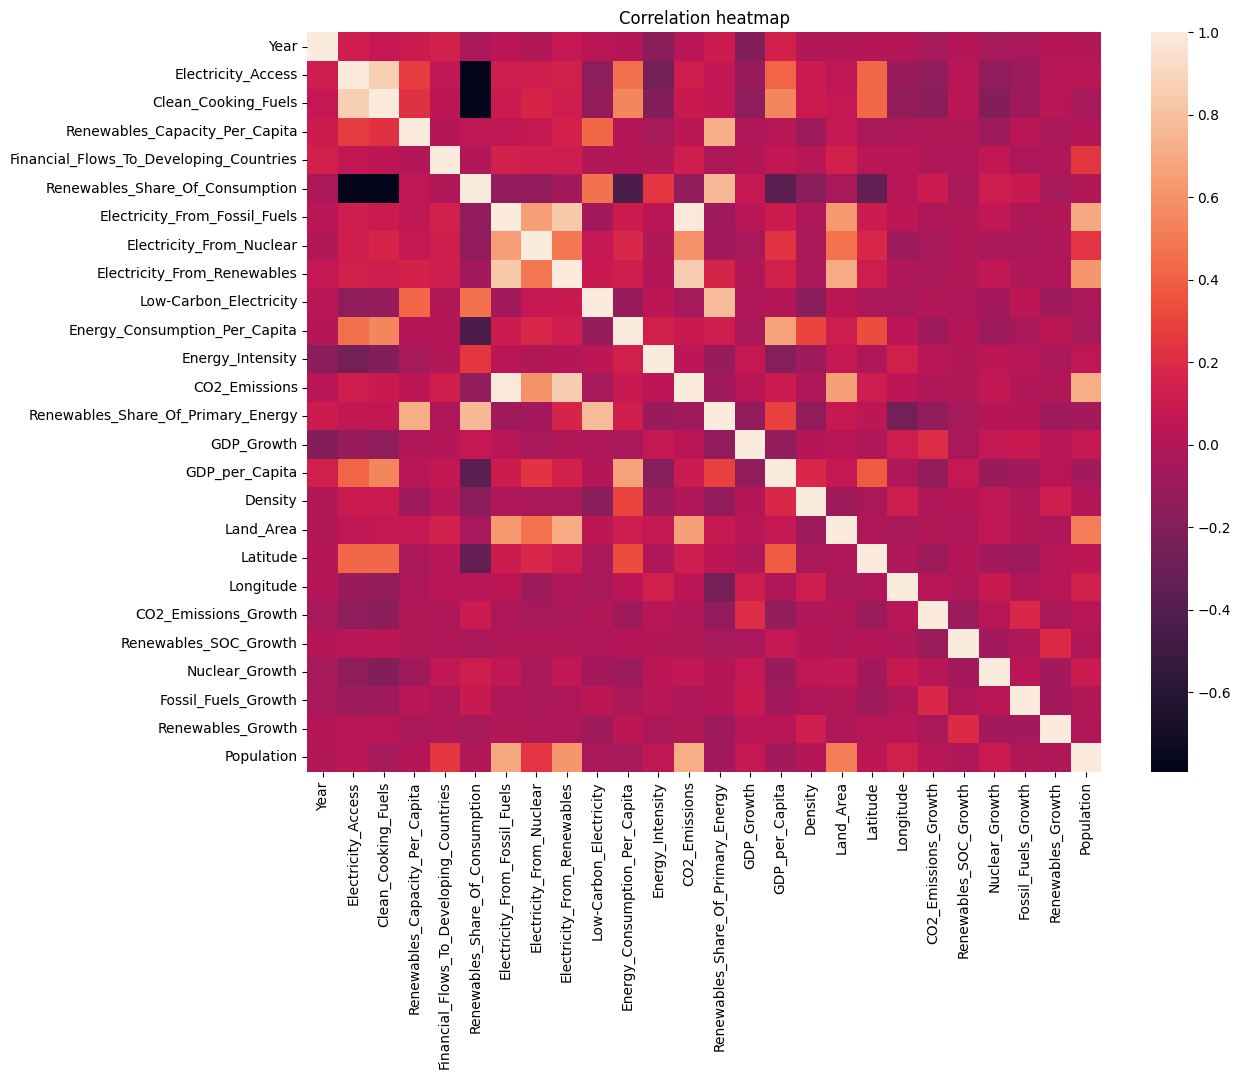

In [677]:
plt.figure(figsize=[2*6.4, 2*4.8])
sns.heatmap(df.corr(method='pearson', numeric_only=True), annot=False) 
plt.title('Correlation heatmap')
plt.savefig("images/Correlation_Heatmap")
plt.show()

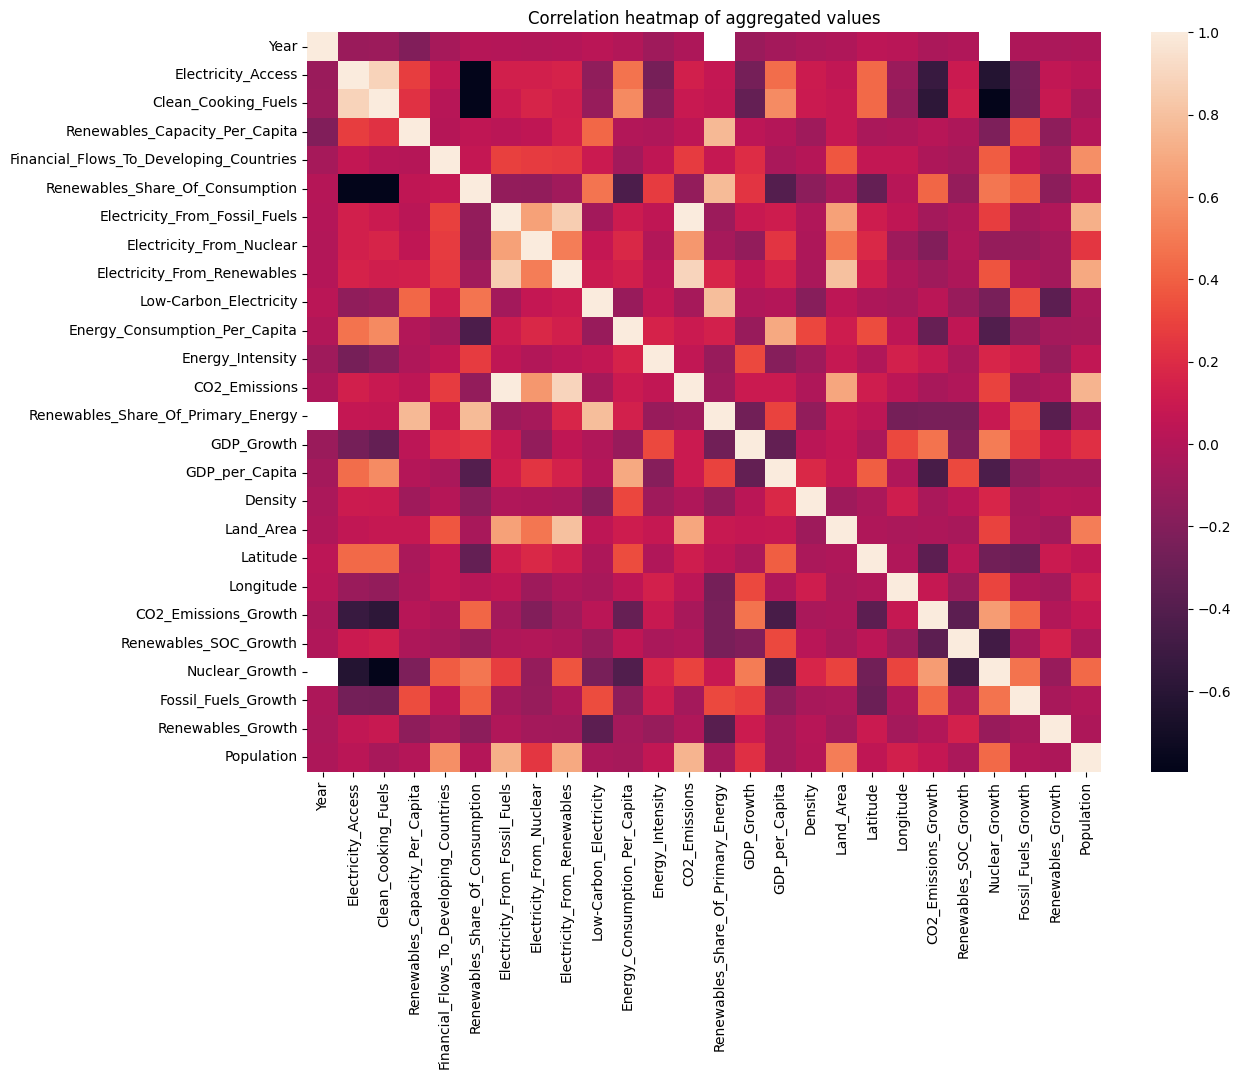

In [678]:
# The "Year" Column is kept to keep the heatmap consistent with the previous one.
plt.figure(figsize=[2*6.4, 2*4.8])
sns.heatmap(df.groupby(by="Country").mean().corr(method='pearson', numeric_only=True), annot=False) 
plt.title('Correlation heatmap of aggregated values')
plt.show()

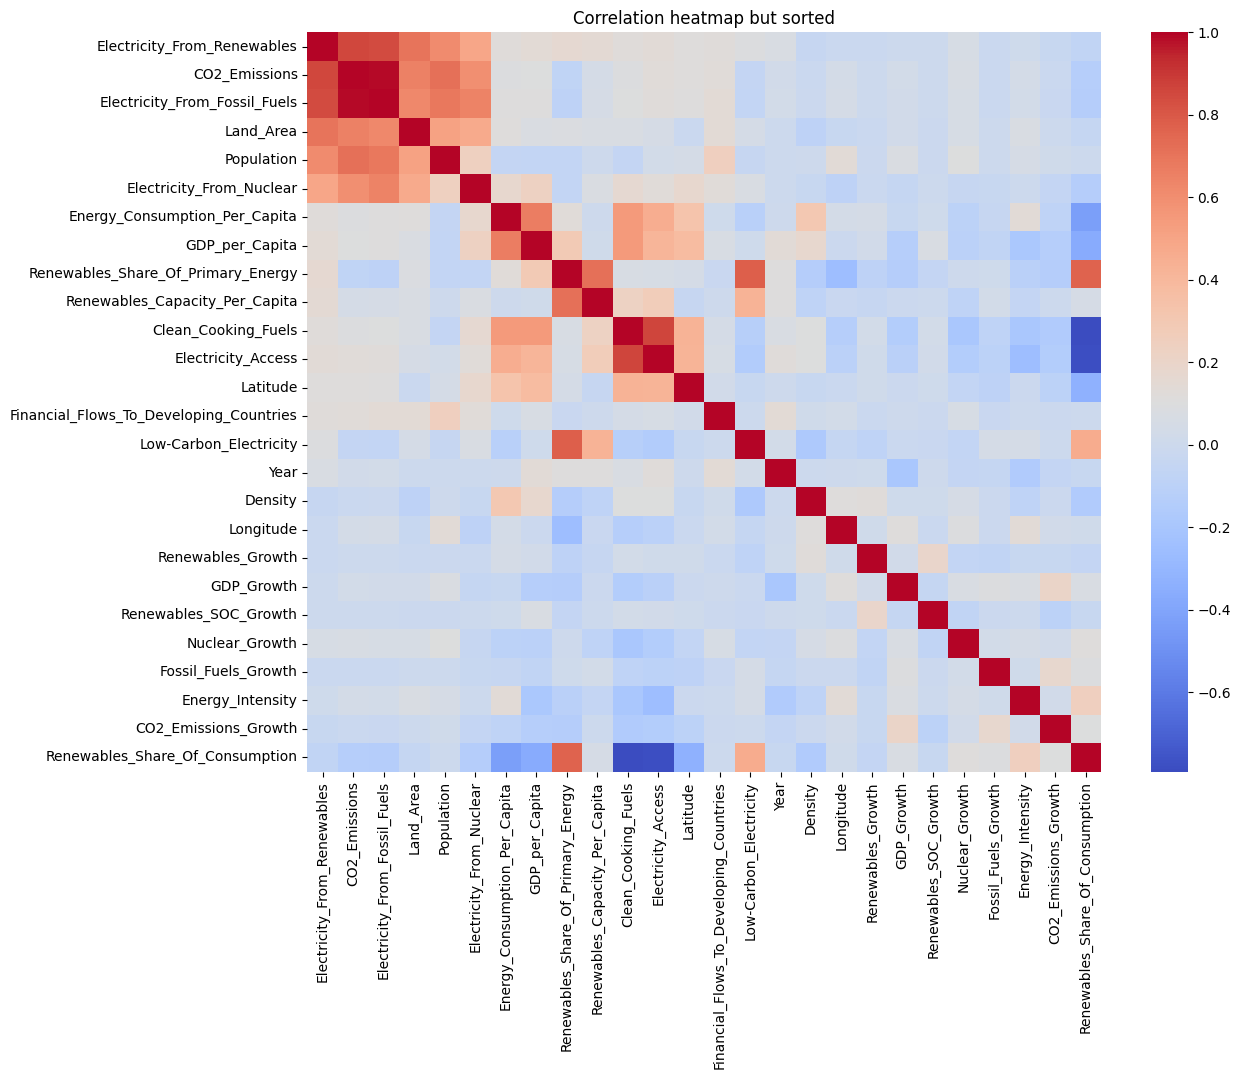

In [679]:
# I've been wondering what it would look like if the values of the correlation matrix were sorted
# I don't think the result is any easier to read than the unsorted version
corelation_matrix = df.corr(method='pearson', numeric_only=True)
sorted_columns = corelation_matrix.sum().sort_values(ascending=False).index
sorted_matrix = corelation_matrix.loc[sorted_columns, sorted_columns]

plt.figure(figsize=[2*6.4, 2*4.8])
sns.heatmap(sorted_matrix, cmap='coolwarm')
plt.title("Correlation heatmap but sorted")
plt.show()


/Users/nolan/PycharmProjects/SustainableEnergy/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


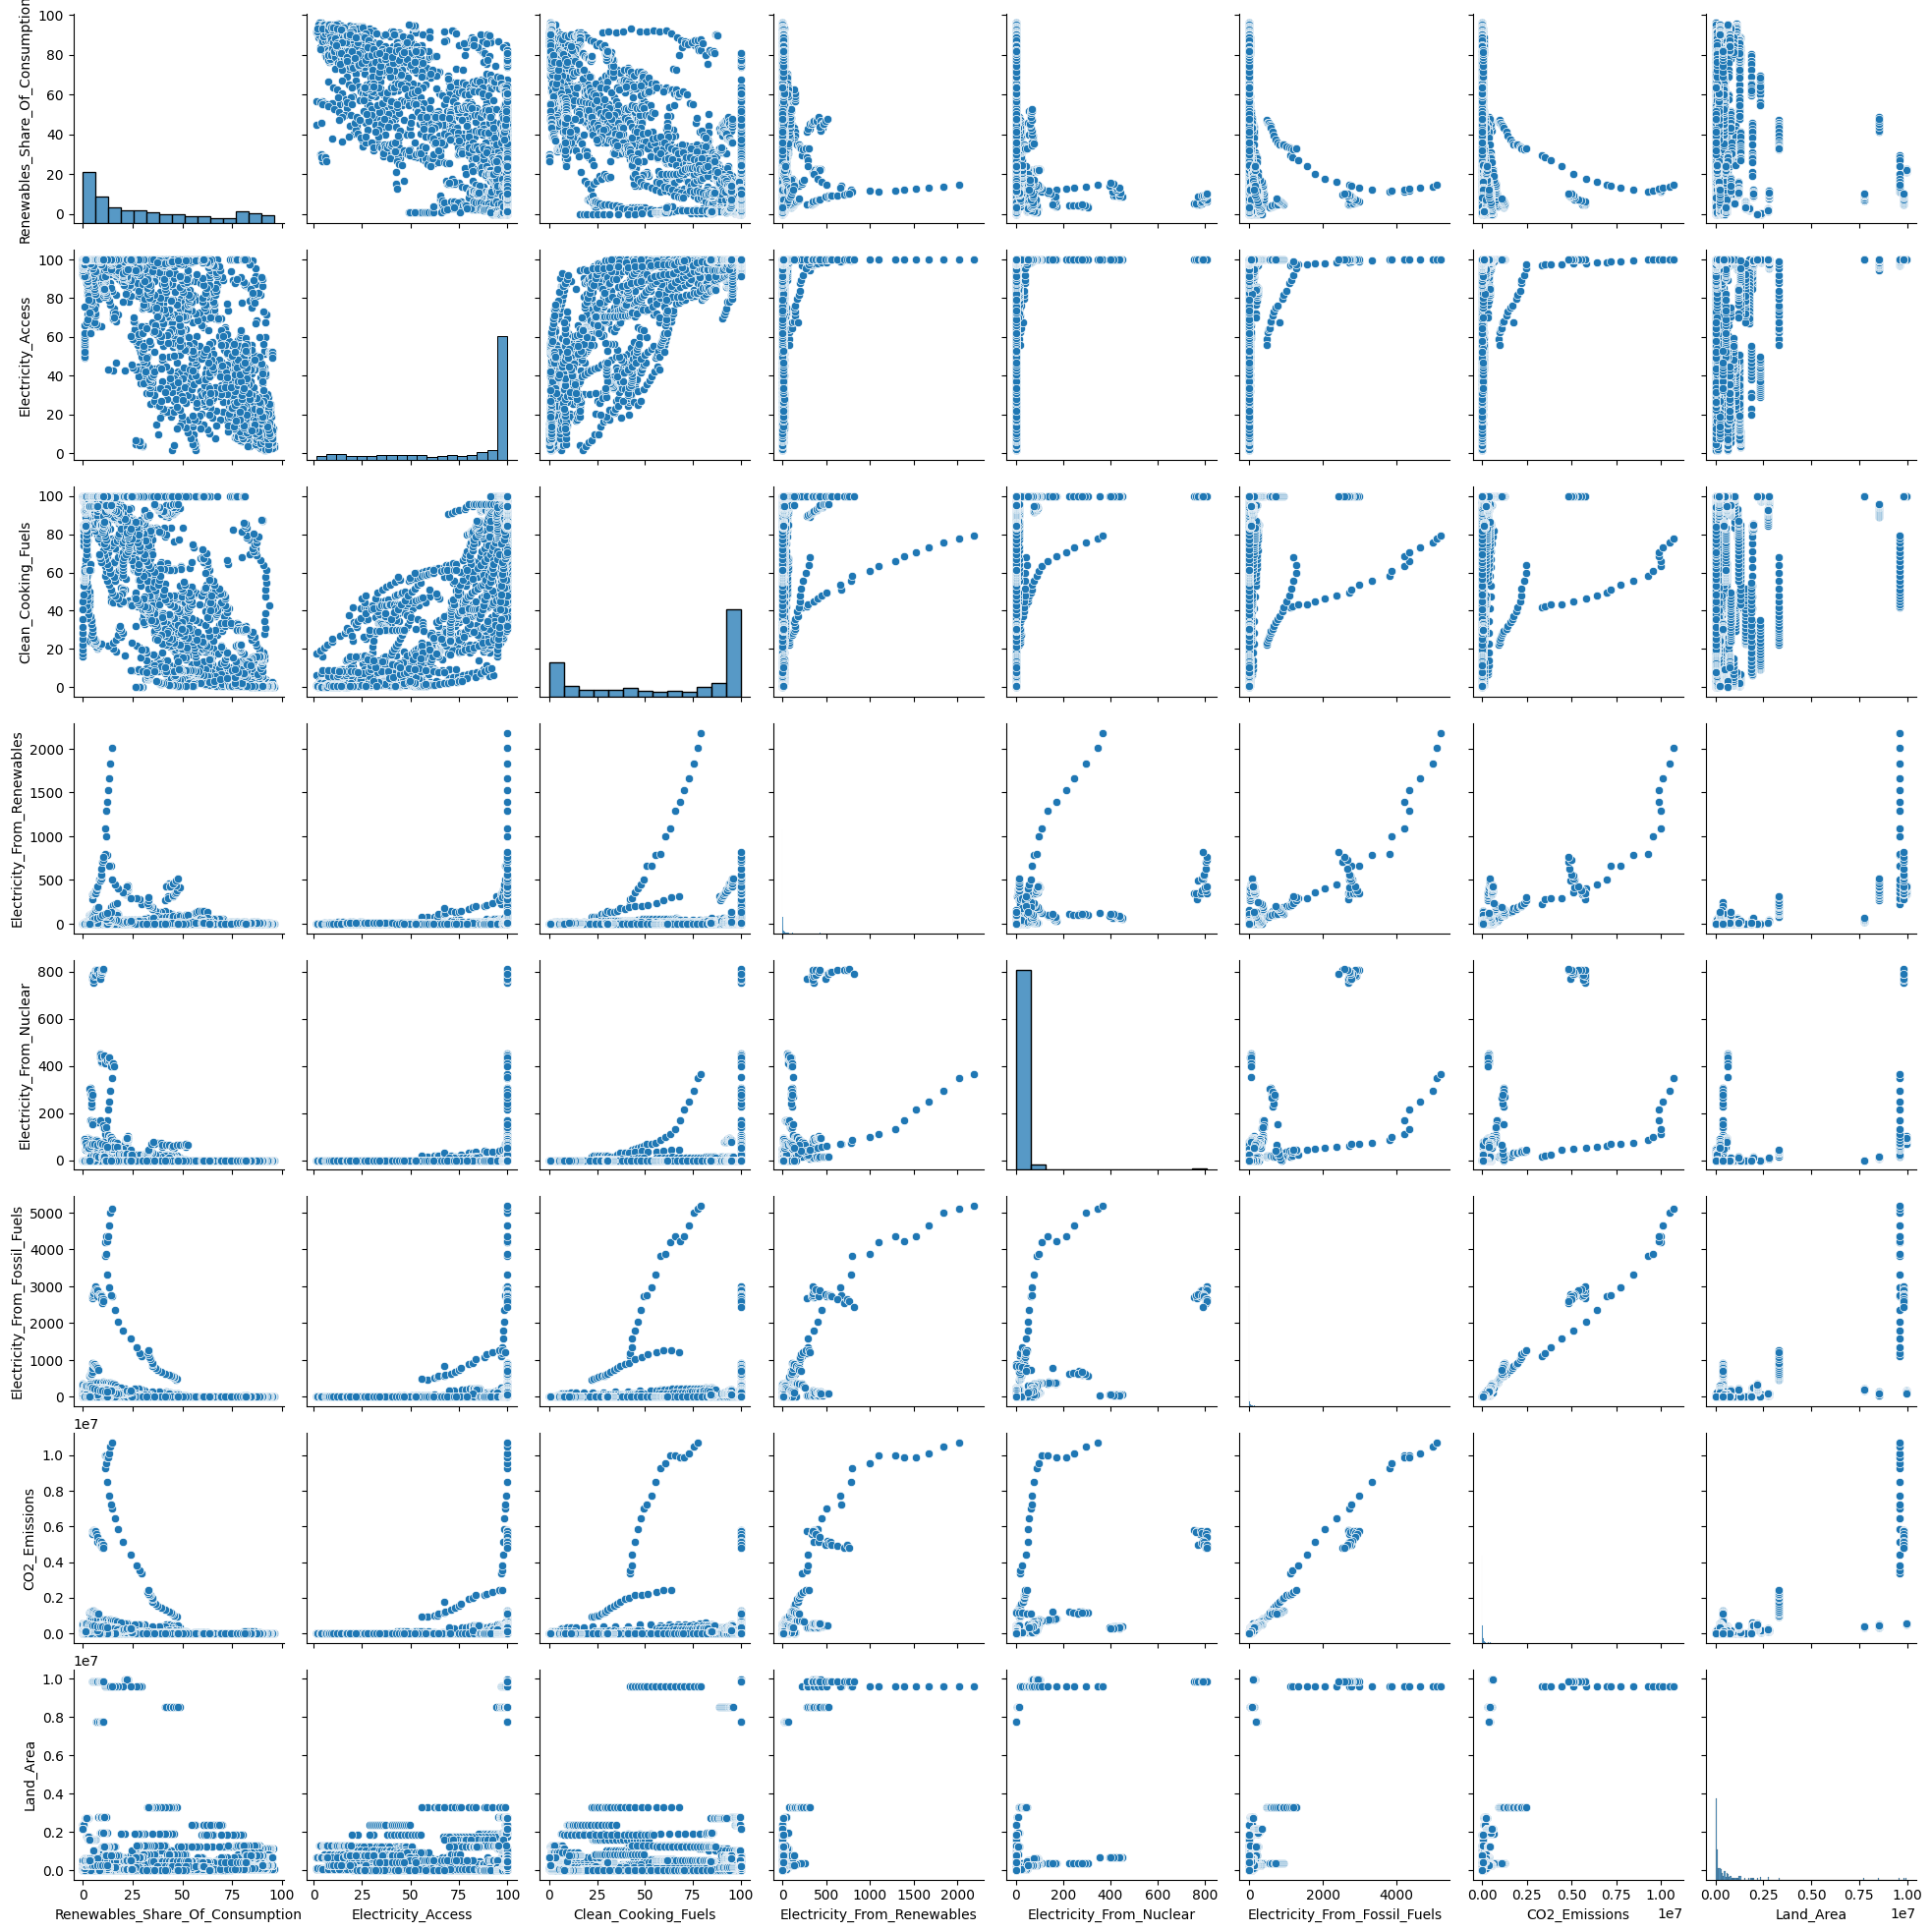

In [680]:
sns.pairplot(df[["Renewables_Share_Of_Consumption", "Electricity_Access", "Clean_Cooking_Fuels", "Electricity_From_Renewables", "Electricity_From_Nuclear", "Electricity_From_Fossil_Fuels", "CO2_Emissions", "Land_Area"]])

/Users/nolan/PycharmProjects/SustainableEnergy/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


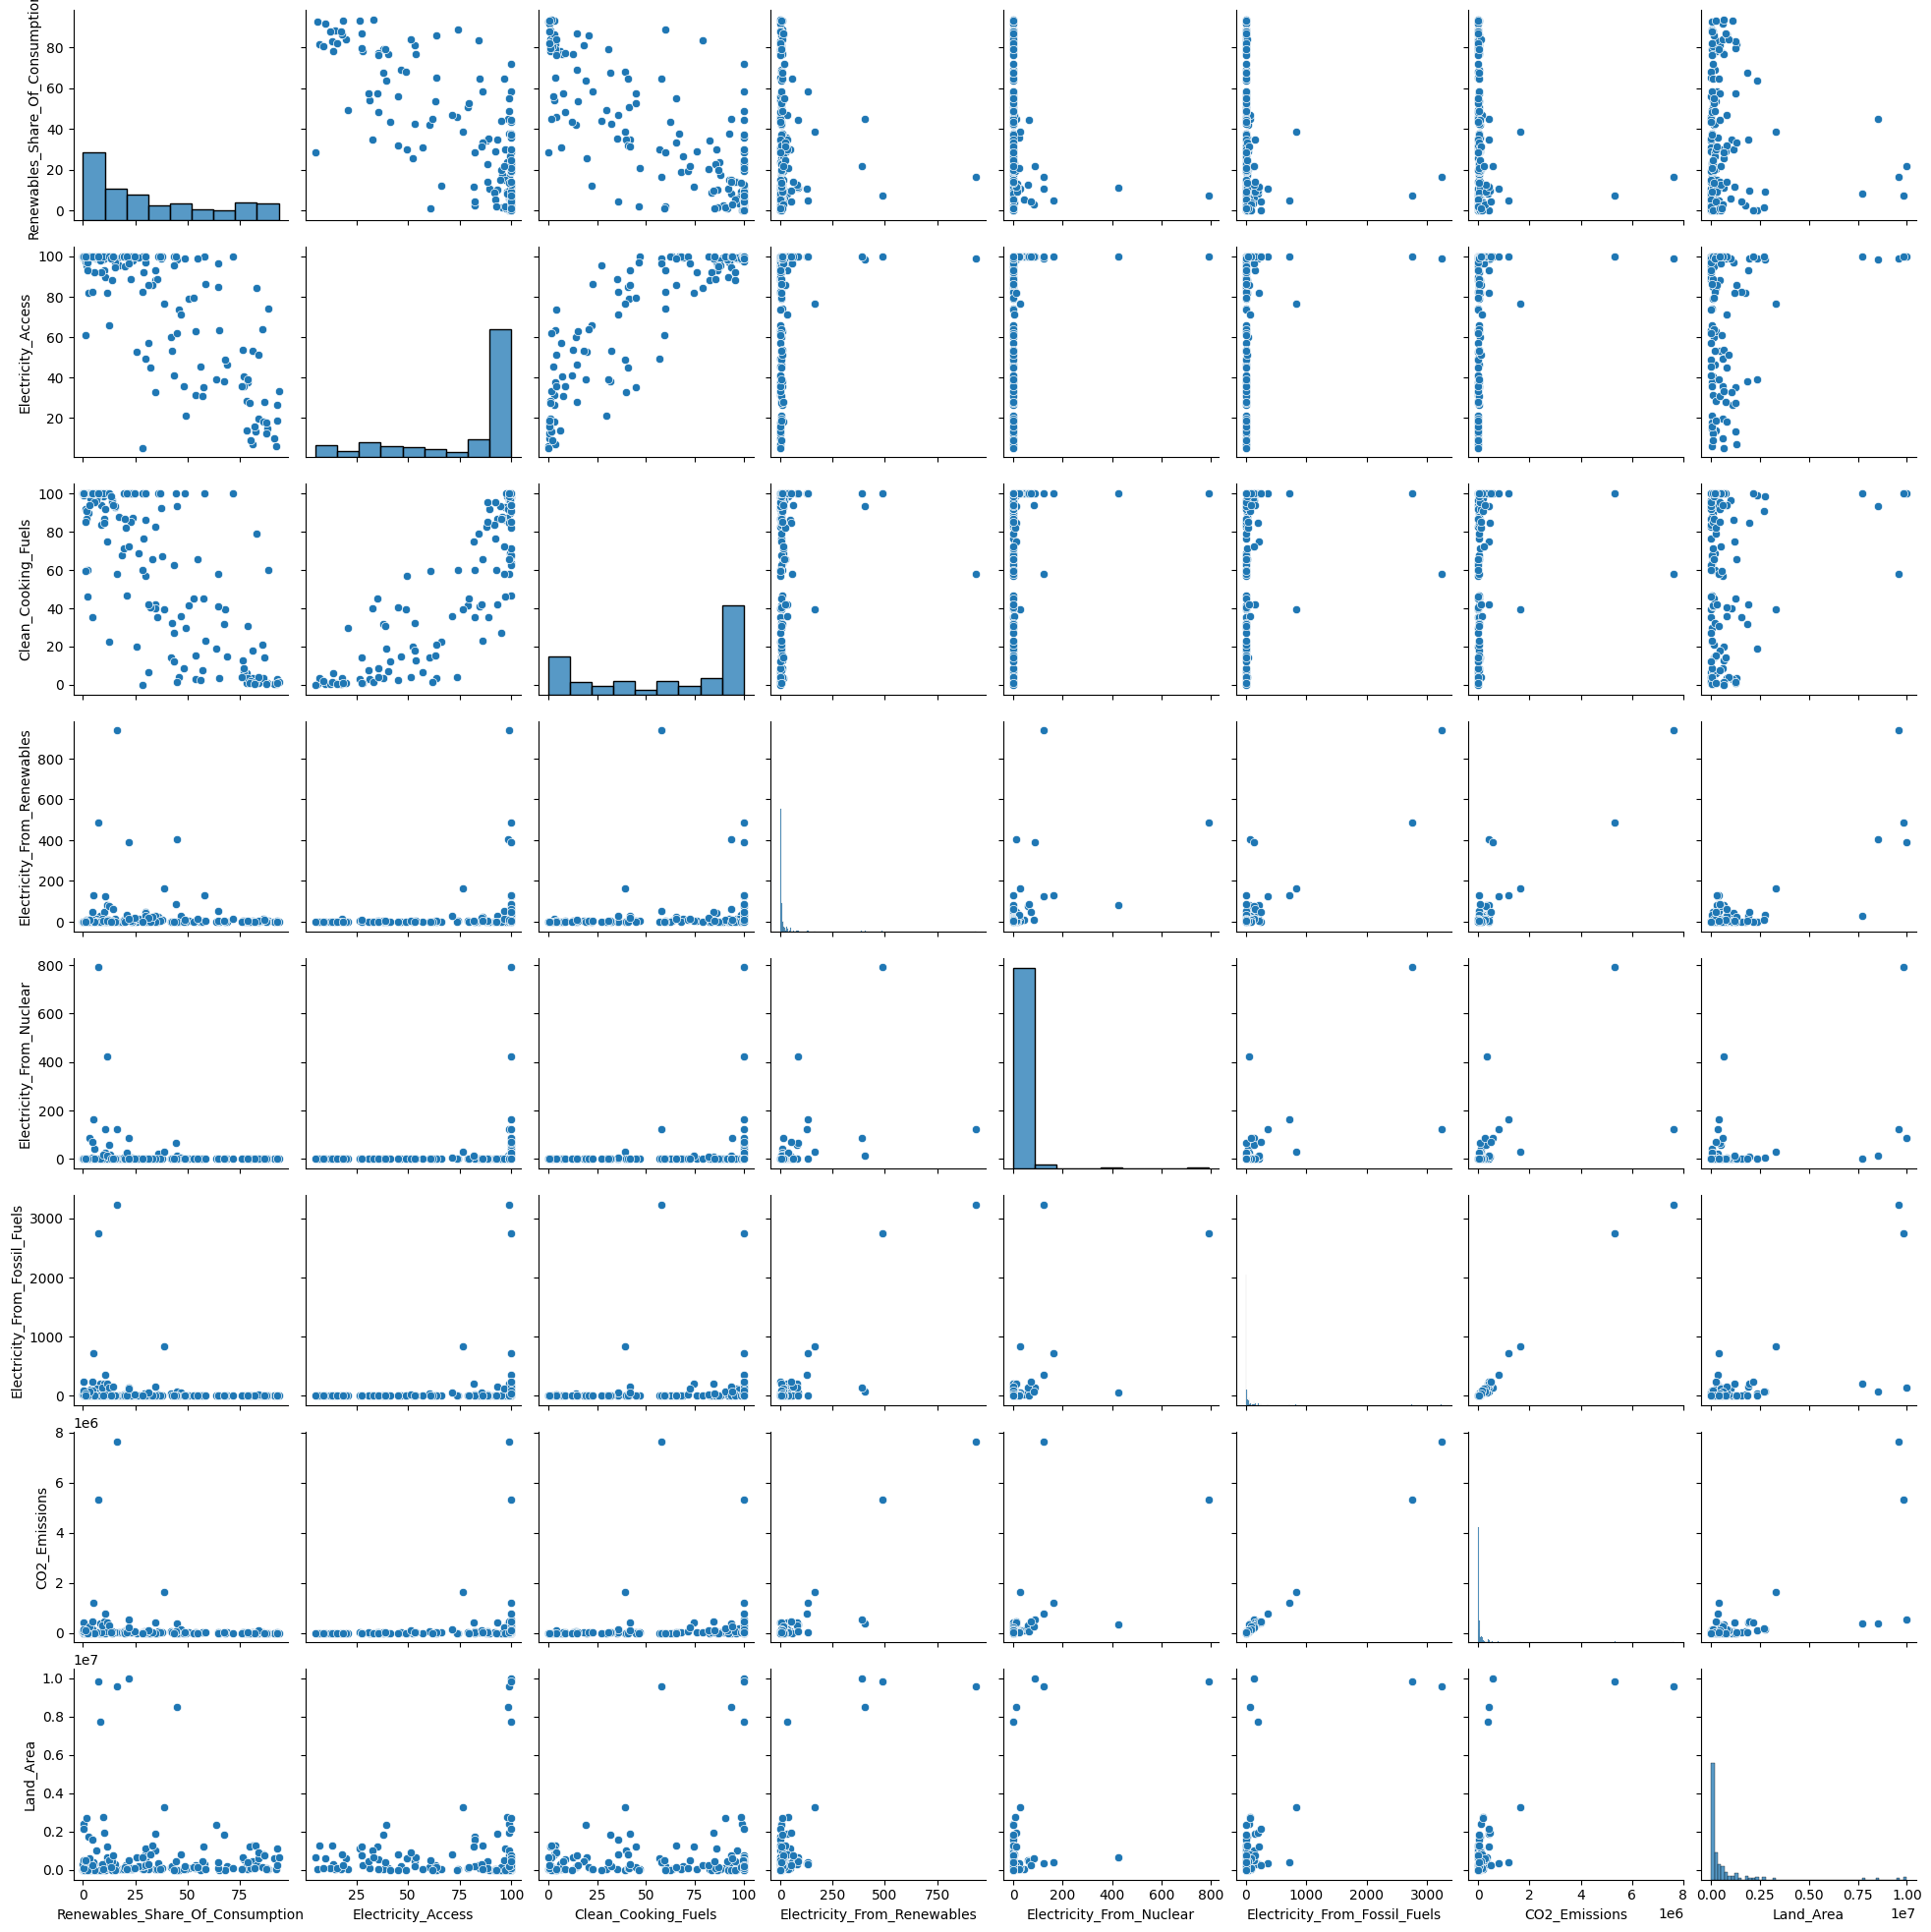

In [681]:
sns.pairplot(df_countries_merged[["Renewables_Share_Of_Consumption", "Electricity_Access", "Clean_Cooking_Fuels", "Electricity_From_Renewables", "Electricity_From_Nuclear", "Electricity_From_Fossil_Fuels", "CO2_Emissions", "Land_Area"]])

In [682]:

df_subset = df[["Country", "Latitude", "Longitude", "CO2_Emissions_Growth", "Renewables_SOC_Growth", "Fossil_Fuels_Growth", "Nuclear_Growth", "Renewables_Growth"]].copy()


df_subset = df_subset.dropna(subset=["Country", "Latitude", "Longitude"])
df_subset = df_subset.fillna(0)
df_subset = df_subset.replace([np.inf, -np.inf], 0)



# df_subset_dropped_nan = df_subset.dropna()
df_aggregated = df_subset.groupby("Country").mean()
# df_aggregated["Log_Renewables_Growth"] = np.log(df_aggregated["Renewables_Growth"])

df_aggregated = df_aggregated.reset_index()
df_aggregated.describe()

,Latitude,Longitude,CO2_Emissions_Growth,Renewables_SOC_Growth,Fossil_Fuels_Growth,Nuclear_Growth,Renewables_Growth
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,18.301850,14.901454,2.761413,4.873137,5.585183,0.508671,9.398359
std,24.195572,66.292662,3.136965,35.288725,9.555443,2.931639,15.487703
min,-40.900557,-175.198242,-3.525252,-4.189479,-19.841270,-4.235102,-14.285714
25%,3.561041,-11.360362,0.000000,-1.089177,0.309990,0.000000,1.788172
50%,17.189877,19.374390,2.552817,-0.052632,3.603699,0.000000,5.277776
75%,39.021963,45.639389,4.742844,2.380498,7.259206,0.000000,10.232279
max,64.963051,178.065032,13.740641,455.088413,66.943602,29.856149,134.278068


In [683]:

gdf_map = gpd.GeoDataFrame(df_aggregated, geometry=gpd.points_from_xy(df_aggregated.Longitude, df_aggregated.Latitude), crs="EPSG:4326").reset_index()

# gdp.datasets is deprecated
# The dataset is public domain on naturalearthdata.com
# https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/
worldMap = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

joined = gpd.sjoin(worldMap, gdf_map, predicate='contains', how="left")

<Figure size 640x480 with 0 Axes>

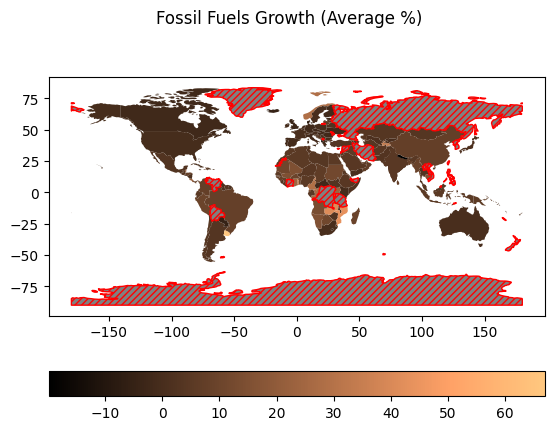

In [684]:
fig = plt.figure()
p = joined.plot(column="Fossil_Fuels_Growth", cmap='copper', legend=True, missing_kwds={'color': 'gray', "edgecolor": "red", "hatch": "/////"}, legend_kwds={"orientation": "horizontal"})
plt.suptitle("Fossil Fuels Growth (Average %)")
plt.gca().set_aspect('equal')
plt.savefig("images/Fossil_Fuels_Growth")
plt.show()

<Figure size 640x480 with 0 Axes>

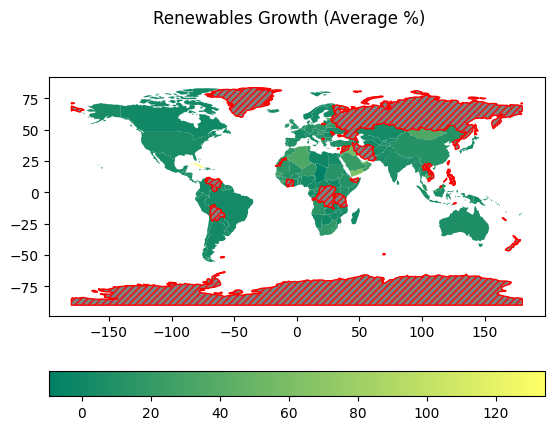

In [685]:
fig = plt.figure()
p = joined.plot(column="Renewables_Growth", cmap='summer', legend=True, missing_kwds={'color': 'gray', "edgecolor": "red", "hatch": "/////"}, legend_kwds={"orientation": "horizontal"})
plt.suptitle("Renewables Growth (Average %)")
plt.gca().set_aspect('equal')
plt.savefig("images/Renewables_Growth")
plt.show()

<Figure size 640x480 with 0 Axes>

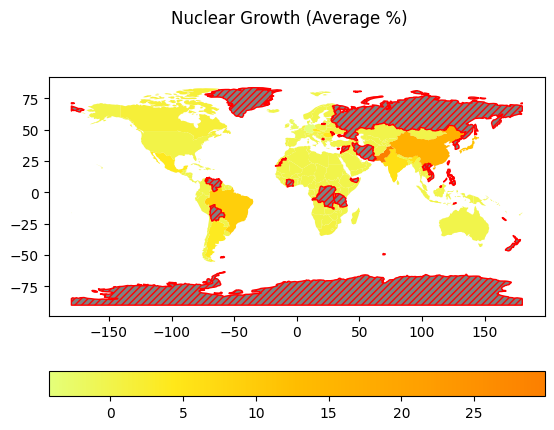

In [686]:
fig = plt.figure()
p = joined.plot(column="Nuclear_Growth", cmap='Wistia', legend=True, missing_kwds={'color': 'gray', "edgecolor": "red", "hatch": "/////"}, legend_kwds={"orientation": "horizontal"})
plt.suptitle("Nuclear Growth (Average %)")
plt.gca().set_aspect('equal')
plt.savefig("images/Nuclear_Growth")
plt.show()

<Figure size 640x480 with 0 Axes>

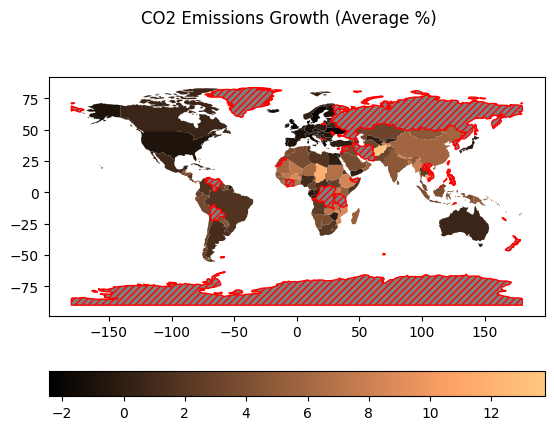

In [687]:
fig = plt.figure()
p = joined.plot(column="CO2_Emissions_Growth", cmap='copper', legend=True, missing_kwds={'color': 'gray', "edgecolor": "red", "hatch": "/////"}, legend_kwds={"orientation": "horizontal"})
plt.suptitle("CO2 Emissions Growth (Average %)")
plt.gca().set_aspect('equal')
plt.savefig("images/CO2_Emissions_Growth")
plt.show()